# **Imports**



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras 
from keras.datasets import mnist

Using TensorFlow backend.


# **load the data**

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


# **visualize the data**
thanks to plt we can see what our handwritten digits look like using the imshow() function

This is a  6


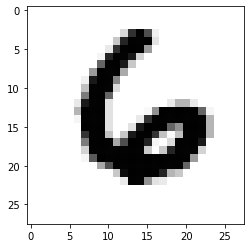

In [3]:
print("This is a ",y_test[463])
plt.imshow(x_test[463],cmap='Greys')

# **Normalize de data**
The images are represented according to the Grey scale politic which means that each image is a matrics made out of pixels and each pixels holds a value included in the [0,255] interval.However it is better for our network to use values between 0 and 1 so we will be doing a normalization.

In [0]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_train=x_train.astype('float32')
x_train/=255

In [0]:
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_test=x_test.astype('float32')
x_test/=255

# **Create model**

now that our data is loaded and normalized, it is time to create the network that will be performing the classification. Since the input data are images a CNN is the best option ! it has the power to extract features from images which makes the learning process a lot easier. In addition to the regular layers of a CNN (Convolution layer, Pooling layer,Flattening layer, Dense layer), a Dropout layer was added to avoid overfitting

In [0]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits='true'),
              metrics=['acc'])

In [8]:
model.fit(x_train,y_train,epochs=10,shuffle='true')

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5429 - acc: 0.9269
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4954 - acc: 0.9685
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4866 - acc: 0.9761
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4819 - acc: 0.9802
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4784 - acc: 0.9838
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4762 - acc: 0.9859
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4745 - acc: 0.9875
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4729 - acc: 0.9888
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4718 - acc: 0.9899
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4714 - acc: 0.9901


In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4753 - acc: 0.9861


[1.4753246307373047, 0.9861000180244446]

#**Conclusion**
After training the model over 10 epochs, its accurac reached 91% which is good ! to make sure the model was learning and not memorising (overfitting) we evaluated it using the test_set. The results of the evaluation was an accuracy of 89% which clode enough to 91%. We can conclude that the model learn and is now able to generalize over unseen data.